In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

pd.set_option('display.max_columns', None)

86400 24 3600


The only plot function  left here, all other plotting functions related to the simulations are placed in the ```Simulation``` class of the ```simulation_core.py```

In [2]:
def plot_mints(mitigated_mints: pd.DataFrame, pure_mints: pd.DataFrame, pool_name: str, width: int=10, height: int=10):
    """plot red line of original mints and blue dots of mitigated ones

    Args:
        mitigated_mints (pd.DataFrame): dataset of mitigated mints
        pure_mints (pd.DataFrame): pure dataset of mints without mitigation
        width (int, optional): width. Defaults to 10.
        height (int, optional): height. Defaults to 10.
    """
    fig, ax = plt.subplots(figsize=(width, height))
    ax2 = ax.twinx()

    ax.plot(pd.to_datetime(pure_mints.timestamp, unit='s'), pure_mints.Y_amount, c='red', label='mitigation off')
    ax2.plot_date(pd.to_datetime(mitigated_mints.timestamp, unit='s'), mitigated_mints.Y_amount, linestyle='--', c='blue', label='mitigation on')

    ax.set_title(f'Scatterplot of the mints for {pool_name} pool')
    plt.legend()
    ax.set_xlabel('time')
    ax.set_ylabel('Y token amount')
    ax2.set_ylabel('Y token mitigated amount')
    fig.autofmt_xdate(rotation=25)
    ax.grid(True, linestyle='--')

    plt.show()

Setting up the simulations parameters, with identifying their paths

**cell below is executed ONLY ONCE BECAUSE OF FOUND MINTS TABLE ERROR**

In some unique cases pools set pairs in unexpected order of tokens, meaning that all mints and burns will differ from expected format and therefore it is required to set them back into expected order. Unexpected order can be found if during simulations most of the transactions are blocked by ```NOT_ENOUGH_RESERVES``` status.

In [3]:
# mints_df = pd.read_pickle(f'{os.getcwd()}\data\pair_history\PERL_WETH\perl_weth_mints.pkl')
# perl_series = mints_df.amount1.copy()   # copy placed, because otherwise reference is placed
# weth_series = mints_df.amount0.copy()
# mints_df.amount0 = perl_series
# mints_df.amount1 = weth_series
# mints_df.to_pickle(f'{os.getcwd()}\data\pair_history\PERL_WETH\perl_weth_mints.pkl')

Each pool has its simulation parameters required to be set up in order to perform correct reading of the pickle files and where to save all simulation results.

In [3]:
# STO token pools
xaut_weth_sim = Simulation(experiment_id = 31, x_name = 'XAUt', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
uma_fei_sim = Simulation(experiment_id = 32, x_name = 'UMA', y_name = 'FEI', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
perl_weth_sim = Simulation(experiment_id = 33, x_name = 'PERL', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
bpt_weth_sim = Simulation(experiment_id = 34, x_name = 'BPT', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
ustonks_usdc_sim = Simulation(experiment_id = 35, x_name = 'uSTONKS_APR_21', y_name = 'USDC', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

# Mirrored shares tokens
mamzn_ust_sim = Simulation(experiment_id = 41, x_name = 'mAMZN', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
mbaba_ust_sim = Simulation(experiment_id = 42, x_name = 'mBABA', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
maapl_ust_sim = Simulation(experiment_id = 43, x_name = 'mAAPL', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

**IMPORTANT: launch those simulations only if there is no data in package ```data\real_transactions```, otherwise skip this part (comment it)**

In [5]:
# # STO token pools
# xaut_weth_sim.run_simulation(isBurnAvailable = False, isMintAvailable = True)   # passed, experiment 31
# uma_fei_sim.run_simulation(isBurnAvailable = False, isMintAvailable = True)     # passed, experiment 32
# perl_weth_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)    # passed, experiment 33
# bpt_weth_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)     # passed, experiment 34
# ustonks_usdc_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True) # passed, experiment 35

# # Mirrored shares token pools
# mamzn_ust_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)    # passed, experiment 41
# mbaba_ust_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)    # passed, experiment 42
# maapl_ust_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)    # passed, experiment 43

## STO token pools (XAUt/WETH, UMA/FEI, PERL/WETH, BPT/WETH, uSTONKS_APR_21/USDC)

In [7]:
xaut_weth_swaps_mitigation_off_df, xaut_weth_mints_mitigation_off_df, xaut_weth_burns_mitigation_off_df = xaut_weth_sim.read_simulation(0)
xaut_weth_swaps_mitigation_on_df, xaut_weth_mints_mitigation_on_df, xaut_weth_burns_mitigation_on_df = xaut_weth_sim.read_simulation(1)

uma_fei_swaps_mitigation_off_df, uma_fei_mints_mitigation_off_df, uma_fei_burns_mitigation_off_df = uma_fei_sim.read_simulation(0)
uma_fei_swaps_mitigation_on_df, uma_fei_mints_mitigation_on_df, uma_fei_burns_mitigation_on_df = uma_fei_sim.read_simulation(1)

perl_weth_swaps_mitigation_off_df, perl_weth_mints_mitigation_off_df, perl_weth_burns_mitigation_off_df = perl_weth_sim.read_simulation(0)
perl_weth_swaps_mitigation_on_df, perl_weth_mints_mitigation_on_df, perl_weth_burns_mitigation_on_df = perl_weth_sim.read_simulation(1)

bpt_weth_swaps_mitigation_off_df, bpt_weth_mints_mitigation_off_df, bpt_weth_burns_mitigation_off_df = bpt_weth_sim.read_simulation(0)
bpt_weth_swaps_mitigation_on_df, bpt_weth_mints_mitigation_on_df, bpt_weth_burns_mitigation_on_df = bpt_weth_sim.read_simulation(1)

ustonks_usdc_swaps_mitigation_off_df, ustonks_usdc_mints_mitigation_off_df, ustonks_usdc_burns_mitigation_off_df = ustonks_usdc_sim.read_simulation(0)
ustonks_usdc_swaps_mitigation_on_df, ustonks_usdc_mints_mitigation_on_df, ustonks_usdc_burns_mitigation_on_df = ustonks_usdc_sim.read_simulation(1)

## Mirrored shares tokens pools (mAMZN/UST, mBABA/UST, mAAPL/UST)

In [8]:
mamzn_ust_swaps_mitigation_off_df, mamzn_ust_mints_mitigation_off_df, mamzn_ust_burns_mitigation_off_df = mamzn_ust_sim.read_simulation(0)
mamzn_ust_swaps_mitigation_on_df, mamzn_ust_mints_mitigation_on_df, mamzn_ust_burns_mitigation_on_df = mamzn_ust_sim.read_simulation(1)

mbaba_ust_swaps_mitigation_off_df, mbaba_ust_mints_mitigation_off_df, mbaba_ust_burns_mitigation_off_df = mbaba_ust_sim.read_simulation(0)
mbaba_ust_swaps_mitigation_on_df, mbaba_ust_mints_mitigation_on_df, mbaba_ust_burns_mitigation_on_df = mbaba_ust_sim.read_simulation(1)

maapl_ust_swaps_mitigation_off_df, maapl_ust_mints_mitigation_off_df, maapl_ust_burns_mitigation_off_df = maapl_ust_sim.read_simulation(0)
maapl_ust_swaps_mitigation_on_df, maapl_ust_mints_mitigation_on_df, maapl_ust_burns_mitigation_on_df = maapl_ust_sim.read_simulation(1)

# XAUt/WETH

In [ ]:
xaut_weth_mints_mitigation_off_df

In [ ]:
xaut_weth_burns_mitigation_off_df

In [ ]:
xaut_weth_swaps_mitigation_off_df

In [ ]:
plot_mints(xaut_weth_mints_mitigation_on_df, xaut_weth_mints_mitigation_off_df, pool_name='XAUt/DAI')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
xaut_weth_filtered_swaps_df, xaut_weth_mevs_df = xaut_weth_sim.extract_filtered_and_mevs_dfs()

In [ ]:
xaut_weth_suspicious_filtered_swaps_df, xaut_weth_possible_mevs_df = xaut_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
xaut_weth_mevs_df = xaut_weth_sim.calculate_attack_profit(xaut_weth_mevs_df)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
xaut_weth_sim.show_mitigation_comparison(xaut_weth_swaps_mitigation_off_df, xaut_weth_swaps_mitigation_on_df)
xaut_weth_sim.px_hist_blocked_transactions_slice(xaut_weth_swaps_mitigation_on_df)
xaut_weth_sim.px_hist_blocked_transactions_difference_from_oracle(xaut_weth_swaps_mitigation_on_df)
xaut_weth_sim.plot_slice_distribution_and_diff_limit_line(xaut_weth_swaps_mitigation_on_df)
xaut_weth_sim.plot_reserves_with_and_without_mitigation(xaut_weth_swaps_mitigation_off_df, xaut_weth_swaps_mitigation_on_df)
xaut_weth_sim.plot_cumulative_prices_with_and_without_mitigation(xaut_weth_swaps_mitigation_off_df, xaut_weth_swaps_mitigation_off_df)
xaut_weth_sim.plot_price_distribution(xaut_weth_swaps_mitigation_off_df, xaut_weth_swaps_mitigation_on_df, separate_plots=True)
xaut_weth_sim.plot_frequency_distribution(xaut_weth_swaps_mitigation_on_df)
xaut_weth_sim.plot_price_impact(xaut_weth_swaps_mitigation_off_df, xaut_weth_swaps_mitigation_on_df, 
                                smallest_y=xaut_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=xaut_weth_swaps_mitigation_off_df['price_diff'].max())

# UMA/FEI

In [ ]:
uma_fei_mints_mitigation_off_df

In [ ]:
uma_fei_burns_mitigation_off_df

In [ ]:
uma_fei_swaps_mitigation_off_df

In [ ]:
plot_mints(uma_fei_mints_mitigation_on_df, uma_fei_mints_mitigation_off_df, pool_name='UMA/FEI')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
uma_fei_filtered_swaps_df, uma_fei_mevs_df = uma_fei_sim.extract_filtered_and_mevs_dfs()

In [ ]:
uma_fei_suspicious_filtered_swaps_df, uma_fei_possible_mevs_df = uma_fei_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
uma_fei_mevs_df = uma_fei_sim.calculate_attack_profit(uma_fei_mevs_df)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
uma_fei_sim.show_mitigation_comparison(uma_fei_swaps_mitigation_off_df, uma_fei_swaps_mitigation_on_df)
uma_fei_sim.px_hist_blocked_transactions_slice(uma_fei_swaps_mitigation_on_df)
uma_fei_sim.px_hist_blocked_transactions_difference_from_oracle(uma_fei_swaps_mitigation_on_df)
uma_fei_sim.plot_slice_distribution_and_diff_limit_line(uma_fei_swaps_mitigation_on_df)
uma_fei_sim.plot_reserves_with_and_without_mitigation(uma_fei_swaps_mitigation_off_df, uma_fei_swaps_mitigation_on_df)
uma_fei_sim.plot_cumulative_prices_with_and_without_mitigation(uma_fei_swaps_mitigation_off_df, uma_fei_swaps_mitigation_off_df)
uma_fei_sim.plot_price_distribution(uma_fei_swaps_mitigation_off_df, uma_fei_swaps_mitigation_on_df, separate_plots=True)
uma_fei_sim.plot_frequency_distribution(uma_fei_swaps_mitigation_on_df)
uma_fei_sim.plot_price_impact(uma_fei_swaps_mitigation_off_df, uma_fei_swaps_mitigation_on_df, 
                                smallest_y=uma_fei_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=uma_fei_swaps_mitigation_off_df['price_diff'].max())

# PERL/WETH

In [ ]:
perl_weth_mints_mitigation_off_df

In [ ]:
perl_weth_burns_mitigation_off_df

In [ ]:
perl_weth_swaps_mitigation_off_df

In [ ]:
plot_mints(perl_weth_mints_mitigation_on_df, perl_weth_mints_mitigation_off_df, pool_name='PERL/WETH')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
perl_weth_filtered_swaps_df, perl_weth_mevs_df = perl_weth_sim.extract_filtered_and_mevs_dfs()

In [ ]:
perl_weth_suspicious_filtered_swaps_df, perl_weth_possible_mevs_df = perl_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
perl_weth_mevs_df = perl_weth_sim.calculate_attack_profit(perl_weth_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

In [ ]:
perl_weth_sim.show_swaps_and_mevs_by_token(perl_weth_filtered_swaps_df, perl_weth_mevs_df, width=15, height=5)

In [ ]:
perl_weth_sim.show_swaps_and_mevs_by_token(perl_weth_suspicious_filtered_swaps_df, perl_weth_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

In [ ]:
perl_weth_sim.show_swaps_and_mevs_daily_count_by_token(perl_weth_filtered_swaps_df, perl_weth_mevs_df, mevs_alter_axis=True)

In [ ]:
perl_weth_sim.show_swaps_and_mevs_daily_count_by_token(perl_weth_suspicious_filtered_swaps_df, perl_weth_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
perl_weth_sim.show_mevs_to_swaps_ratio(perl_weth_filtered_swaps_df, perl_weth_mevs_df)

In [ ]:
perl_weth_sim.show_mevs_to_swaps_ratio(perl_weth_suspicious_filtered_swaps_df, perl_weth_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
perl_weth_sim.show_mevs_to_reserves_ratio(perl_weth_swaps_mitigation_off_df, perl_weth_mevs_df, width=15, height=10)
perl_weth_sim.show_mevs_values_to_reserves_ratio(perl_weth_swaps_mitigation_off_df, perl_weth_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
perl_weth_sim.plot_transactions_by_type(perl_weth_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
perl_weth_sim.show_mitigation_comparison(perl_weth_swaps_mitigation_off_df, perl_weth_swaps_mitigation_on_df)
perl_weth_sim.px_hist_blocked_transactions_slice(perl_weth_swaps_mitigation_on_df)
perl_weth_sim.px_hist_blocked_transactions_difference_from_oracle(perl_weth_swaps_mitigation_on_df)
perl_weth_sim.plot_slice_distribution_and_diff_limit_line(perl_weth_swaps_mitigation_on_df)
perl_weth_sim.plot_reserves_with_and_without_mitigation(perl_weth_swaps_mitigation_off_df, perl_weth_swaps_mitigation_on_df)
perl_weth_sim.plot_cumulative_prices_with_and_without_mitigation(perl_weth_swaps_mitigation_off_df, perl_weth_swaps_mitigation_off_df, make_big_num_convert=True)
perl_weth_sim.plot_price_distribution(perl_weth_swaps_mitigation_off_df, perl_weth_swaps_mitigation_on_df, separate_plots=True)
perl_weth_sim.plot_frequency_distribution(perl_weth_swaps_mitigation_on_df)
perl_weth_sim.plot_price_impact(perl_weth_swaps_mitigation_off_df, perl_weth_swaps_mitigation_on_df, 
                                smallest_y=perl_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=perl_weth_swaps_mitigation_off_df['price_diff'].max())

# BPT/WETH

In [ ]:
bpt_weth_mints_mitigation_off_df

In [ ]:
bpt_weth_burns_mitigation_off_df

In [ ]:
bpt_weth_swaps_mitigation_off_df

In [ ]:
plot_mints(bpt_weth_mints_mitigation_on_df, bpt_weth_mints_mitigation_off_df, pool_name='BPT/WETH')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
bpt_weth_filtered_swaps_df, bpt_weth_mevs_df = bpt_weth_sim.extract_filtered_and_mevs_dfs()

In [ ]:
bpt_weth_suspicious_filtered_swaps_df, bpt_weth_possible_mevs_df = bpt_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
bpt_weth_mevs_df = bpt_weth_sim.calculate_attack_profit(bpt_weth_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

In [ ]:
bpt_weth_sim.show_swaps_and_mevs_by_token(bpt_weth_filtered_swaps_df, bpt_weth_mevs_df, width=15, height=5)

In [ ]:
bpt_weth_sim.show_swaps_and_mevs_by_token(bpt_weth_suspicious_filtered_swaps_df, bpt_weth_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

In [ ]:
bpt_weth_sim.show_swaps_and_mevs_daily_count_by_token(bpt_weth_filtered_swaps_df, bpt_weth_mevs_df, mevs_alter_axis=True)

In [ ]:
bpt_weth_sim.show_swaps_and_mevs_daily_count_by_token(bpt_weth_suspicious_filtered_swaps_df, bpt_weth_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
bpt_weth_sim.show_mevs_to_swaps_ratio(bpt_weth_filtered_swaps_df, bpt_weth_mevs_df)

In [ ]:
bpt_weth_sim.show_mevs_to_swaps_ratio(bpt_weth_suspicious_filtered_swaps_df, bpt_weth_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
bpt_weth_sim.show_mevs_to_reserves_ratio(bpt_weth_swaps_mitigation_off_df, bpt_weth_mevs_df, width=15, height=10)
bpt_weth_sim.show_mevs_values_to_reserves_ratio(bpt_weth_swaps_mitigation_off_df, bpt_weth_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
bpt_weth_sim.plot_transactions_by_type(bpt_weth_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
bpt_weth_sim.show_mitigation_comparison(bpt_weth_swaps_mitigation_off_df, bpt_weth_swaps_mitigation_on_df)
bpt_weth_sim.px_hist_blocked_transactions_slice(bpt_weth_swaps_mitigation_on_df)
bpt_weth_sim.px_hist_blocked_transactions_difference_from_oracle(bpt_weth_swaps_mitigation_on_df)
bpt_weth_sim.plot_slice_distribution_and_diff_limit_line(bpt_weth_swaps_mitigation_on_df)
bpt_weth_sim.plot_reserves_with_and_without_mitigation(bpt_weth_swaps_mitigation_off_df, bpt_weth_swaps_mitigation_on_df)
bpt_weth_sim.plot_cumulative_prices_with_and_without_mitigation(bpt_weth_swaps_mitigation_off_df, bpt_weth_swaps_mitigation_off_df, make_big_num_convert=True)
bpt_weth_sim.plot_price_distribution(bpt_weth_swaps_mitigation_off_df, bpt_weth_swaps_mitigation_on_df, separate_plots=True)
bpt_weth_sim.plot_frequency_distribution(bpt_weth_swaps_mitigation_on_df)
bpt_weth_sim.plot_price_impact(bpt_weth_swaps_mitigation_off_df, bpt_weth_swaps_mitigation_on_df, 
                                smallest_y=bpt_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=bpt_weth_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
bpt_weth_blocked_df = bpt_weth_swaps_mitigation_on_df[bpt_weth_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
bpt_weth_blocked_mevs_df = pd.merge(bpt_weth_blocked_df, bpt_weth_mevs_df, on='txd')
bpt_weth_blocked_mevs_df

In [ ]:
bpt_weth_blocked_df = bpt_weth_swaps_mitigation_on_df[bpt_weth_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
bpt_weth_blocked_mevs_df = pd.merge(bpt_weth_blocked_df, bpt_weth_possible_mevs_df, on='txd')
bpt_weth_blocked_mevs_df

# uStonks_APR_21/USDC

In [ ]:
ustonks_usdc_mints_mitigation_off_df

In [ ]:
ustonks_usdc_burns_mitigation_off_df

In [ ]:
ustonks_usdc_swaps_mitigation_off_df

In [ ]:
plot_mints(ustonks_usdc_mints_mitigation_on_df, ustonks_usdc_mints_mitigation_off_df, pool_name='uSTONKS_APR_21/DAI')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
ustonks_usdc_filtered_swaps_df, ustonks_usdc_mevs_df = ustonks_usdc_sim.extract_filtered_and_mevs_dfs()

In [ ]:
ustonks_usdc_suspicious_filtered_swaps_df, ustonks_usdc_possible_mevs_df = ustonks_usdc_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
ustonks_usdc_mevs_df = ustonks_usdc_sim.calculate_attack_profit(ustonks_usdc_mevs_df)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
ustonks_usdc_sim.show_mitigation_comparison(ustonks_usdc_swaps_mitigation_off_df, ustonks_usdc_swaps_mitigation_on_df)
ustonks_usdc_sim.px_hist_blocked_transactions_slice(ustonks_usdc_swaps_mitigation_on_df)
ustonks_usdc_sim.px_hist_blocked_transactions_difference_from_oracle(ustonks_usdc_swaps_mitigation_on_df)
ustonks_usdc_sim.plot_slice_distribution_and_diff_limit_line(ustonks_usdc_swaps_mitigation_on_df)
ustonks_usdc_sim.plot_reserves_with_and_without_mitigation(ustonks_usdc_swaps_mitigation_off_df, ustonks_usdc_swaps_mitigation_on_df)
ustonks_usdc_sim.plot_cumulative_prices_with_and_without_mitigation(ustonks_usdc_swaps_mitigation_off_df, ustonks_usdc_swaps_mitigation_off_df, make_big_num_convert=True)
ustonks_usdc_sim.plot_price_distribution(ustonks_usdc_swaps_mitigation_off_df, ustonks_usdc_swaps_mitigation_on_df, separate_plots=True)
ustonks_usdc_sim.plot_frequency_distribution(ustonks_usdc_swaps_mitigation_on_df)
ustonks_usdc_sim.plot_price_impact(ustonks_usdc_swaps_mitigation_off_df, ustonks_usdc_swaps_mitigation_on_df, 
                                smallest_y=ustonks_usdc_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=ustonks_usdc_swaps_mitigation_off_df['price_diff'].max())

# mAMZN/UST

In [ ]:
mamzn_ust_mints_mitigation_off_df

In [ ]:
mamzn_ust_burns_mitigation_off_df

In [ ]:
mamzn_ust_swaps_mitigation_off_df

In [ ]:
plot_mints(mamzn_ust_mints_mitigation_on_df, mamzn_ust_mints_mitigation_off_df, pool_name='mAMZN/UST')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
mamzn_ust_filtered_swaps_df, mamzn_ust_mevs_df = mamzn_ust_sim.extract_filtered_and_mevs_dfs()

In [ ]:
mamzn_ust_suspicious_filtered_swaps_df, mamzn_ust_possible_mevs_df = mamzn_ust_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
mamzn_ust_mevs_df = mamzn_ust_sim.calculate_attack_profit(mamzn_ust_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

In [ ]:
mamzn_ust_sim.show_swaps_and_mevs_by_token(mamzn_ust_filtered_swaps_df, mamzn_ust_mevs_df, width=15, height=5)

In [ ]:
mamzn_ust_sim.show_swaps_and_mevs_by_token(mamzn_ust_suspicious_filtered_swaps_df, mamzn_ust_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

In [ ]:
mamzn_ust_sim.show_swaps_and_mevs_daily_count_by_token(mamzn_ust_filtered_swaps_df, mamzn_ust_mevs_df, mevs_alter_axis=True)

In [ ]:
mamzn_ust_sim.show_swaps_and_mevs_daily_count_by_token(mamzn_ust_suspicious_filtered_swaps_df, mamzn_ust_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
mamzn_ust_sim.show_mevs_to_swaps_ratio(mamzn_ust_filtered_swaps_df, mamzn_ust_mevs_df)

In [ ]:
mamzn_ust_sim.show_mevs_to_swaps_ratio(mamzn_ust_suspicious_filtered_swaps_df, mamzn_ust_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
mamzn_ust_sim.show_mevs_to_reserves_ratio(mamzn_ust_swaps_mitigation_off_df, mamzn_ust_mevs_df, width=15, height=10)
mamzn_ust_sim.show_mevs_values_to_reserves_ratio(mamzn_ust_swaps_mitigation_off_df, mamzn_ust_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
mamzn_ust_sim.plot_transactions_by_type(mamzn_ust_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
mamzn_ust_sim.show_mitigation_comparison(mamzn_ust_swaps_mitigation_off_df, mamzn_ust_swaps_mitigation_on_df)
mamzn_ust_sim.px_hist_blocked_transactions_slice(mamzn_ust_swaps_mitigation_on_df)
mamzn_ust_sim.px_hist_blocked_transactions_difference_from_oracle(mamzn_ust_swaps_mitigation_on_df)
mamzn_ust_sim.plot_slice_distribution_and_diff_limit_line(mamzn_ust_swaps_mitigation_on_df)
mamzn_ust_sim.plot_reserves_with_and_without_mitigation(mamzn_ust_swaps_mitigation_off_df, mamzn_ust_swaps_mitigation_on_df)
mamzn_ust_sim.plot_cumulative_prices_with_and_without_mitigation(mamzn_ust_swaps_mitigation_off_df, mamzn_ust_swaps_mitigation_off_df, make_big_num_convert=True)
mamzn_ust_sim.plot_price_distribution(mamzn_ust_swaps_mitigation_off_df, mamzn_ust_swaps_mitigation_on_df, separate_plots=True)
mamzn_ust_sim.plot_frequency_distribution(mamzn_ust_swaps_mitigation_on_df)
mamzn_ust_sim.plot_price_impact(mamzn_ust_swaps_mitigation_off_df, mamzn_ust_swaps_mitigation_on_df, 
                                smallest_y=mamzn_ust_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=mamzn_ust_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
mamzn_ust_blocked_df = mamzn_ust_swaps_mitigation_on_df[mamzn_ust_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
mamzn_ust_blocked_mevs_df = pd.merge(mamzn_ust_blocked_df, mamzn_ust_mevs_df, on='txd')
mamzn_ust_blocked_mevs_df

In [ ]:
mamzn_ust_blocked_df = mamzn_ust_swaps_mitigation_on_df[mamzn_ust_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
mamzn_ust_blocked_mevs_df = pd.merge(mamzn_ust_blocked_df, mamzn_ust_possible_mevs_df, on='txd')
mamzn_ust_blocked_mevs_df

# AAPL/UST

In [ ]:
maapl_ust_mints_mitigation_off_df

In [ ]:
maapl_ust_burns_mitigation_off_df

In [ ]:
maapl_ust_swaps_mitigation_off_df

In [ ]:
plot_mints(maapl_ust_mints_mitigation_on_df, maapl_ust_mints_mitigation_off_df, pool_name='mAAPL/UST')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
maapl_ust_filtered_swaps_df, maapl_ust_mevs_df = maapl_ust_sim.extract_filtered_and_mevs_dfs()

In [ ]:
maapl_ust_suspicious_filtered_swaps_df, maapl_ust_possible_mevs_df = maapl_ust_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
maapl_ust_mevs_df = maapl_ust_sim.calculate_attack_profit(maapl_ust_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

In [ ]:
maapl_ust_sim.show_swaps_and_mevs_by_token(maapl_ust_filtered_swaps_df, maapl_ust_mevs_df, width=15, height=5)

In [ ]:
maapl_ust_sim.show_swaps_and_mevs_by_token(maapl_ust_suspicious_filtered_swaps_df, maapl_ust_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

In [ ]:
maapl_ust_sim.show_swaps_and_mevs_daily_count_by_token(maapl_ust_filtered_swaps_df, maapl_ust_mevs_df, mevs_alter_axis=True)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

In [ ]:
maapl_ust_sim.show_swaps_and_mevs_daily_count_by_token(maapl_ust_suspicious_filtered_swaps_df, maapl_ust_possible_mevs_df, mevs_alter_axis=True)

In [ ]:
maapl_ust_sim.show_swaps_and_mevs_daily_count_by_token(maapl_ust_suspicious_filtered_swaps_df, maapl_ust_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
maapl_ust_sim.show_mevs_to_swaps_ratio(maapl_ust_filtered_swaps_df, maapl_ust_mevs_df)

In [ ]:
maapl_ust_sim.show_mevs_to_swaps_ratio(maapl_ust_suspicious_filtered_swaps_df, maapl_ust_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
maapl_ust_sim.show_mevs_to_reserves_ratio(maapl_ust_swaps_mitigation_off_df, maapl_ust_mevs_df, width=15, height=10)
maapl_ust_sim.show_mevs_values_to_reserves_ratio(maapl_ust_swaps_mitigation_off_df, maapl_ust_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
maapl_ust_sim.plot_transactions_by_type(maapl_ust_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
maapl_ust_sim.show_mitigation_comparison(maapl_ust_swaps_mitigation_off_df, maapl_ust_swaps_mitigation_on_df)
maapl_ust_sim.px_hist_blocked_transactions_slice(maapl_ust_swaps_mitigation_on_df)
maapl_ust_sim.px_hist_blocked_transactions_difference_from_oracle(maapl_ust_swaps_mitigation_on_df)
maapl_ust_sim.plot_slice_distribution_and_diff_limit_line(maapl_ust_swaps_mitigation_on_df)
maapl_ust_sim.plot_reserves_with_and_without_mitigation(maapl_ust_swaps_mitigation_off_df, maapl_ust_swaps_mitigation_on_df)
maapl_ust_sim.plot_cumulative_prices_with_and_without_mitigation(maapl_ust_swaps_mitigation_off_df, maapl_ust_swaps_mitigation_off_df, make_big_num_convert=True)
maapl_ust_sim.plot_price_distribution(maapl_ust_swaps_mitigation_off_df, maapl_ust_swaps_mitigation_on_df, separate_plots=True)
maapl_ust_sim.plot_frequency_distribution(maapl_ust_swaps_mitigation_on_df)
maapl_ust_sim.plot_price_impact(maapl_ust_swaps_mitigation_off_df, maapl_ust_swaps_mitigation_on_df, 
                                smallest_y=maapl_ust_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=maapl_ust_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
maapl_ust_blocked_df = maapl_ust_swaps_mitigation_on_df[maapl_ust_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
maapl_ust_blocked_mevs_df = pd.merge(maapl_ust_blocked_df, maapl_ust_mevs_df, on='txd')
maapl_ust_blocked_mevs_df

In [ ]:
maapl_ust_blocked_df = maapl_ust_swaps_mitigation_on_df[maapl_ust_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
maapl_ust_blocked_mevs_df = pd.merge(maapl_ust_blocked_df, maapl_ust_possible_mevs_df, on='txd')
maapl_ust_blocked_mevs_df

# mBABA/UST

In [5]:
mbaba_ust_mints_mitigation_off_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on
0,0,1167.962326,311331.417600,1607013645,SUCCESS,0.0,1.607014e+09,1607013645,0,0.000000,0.000000e+00,0.000000e+00,0,0,False,1167.962326,3.113314e+05,3.636234e+08,0,0,False
1,2,3.542464,950.040144,1607022382,SUCCESS,583.0,1.607022e+09,1607022382,2,1164.444659,3.122776e+05,3.636300e+08,0,0,False,1167.987123,3.132277e+05,3.658459e+08,0,0,False
2,7,0.750242,207.513703,1607024888,SUCCESS,750.0,1.607025e+09,1607024888,7,1158.226603,3.159002e+05,3.658840e+08,712493,9,False,1158.976846,3.161077e+05,3.663615e+08,712493,9,False
3,10,7.805269,2218.220421,1607025001,SUCCESS,758.0,1.607025e+09,1607025001,10,1135.680616,3.226315e+05,3.664064e+08,733120,10,False,1143.485885,3.248497e+05,3.714611e+08,733120,10,False
4,11,8.284386,2354.383024,1607025009,SUCCESS,758.0,1.607025e+09,1607025009,11,1143.485885,3.248497e+05,3.714611e+08,733120,10,False,1151.770271,3.272041e+05,3.768640e+08,733120,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2245,43.152635,7515.604320,1637143562,SUCCESS,2008662.0,1.637144e+09,1637143562,2245,42008.800910,7.275469e+06,3.056337e+11,6542488121,142956,False,42051.953545,7.282984e+06,3.062637e+11,6542488121,142956,False
297,2248,142.621975,24768.679900,1637212139,SUCCESS,2013233.0,1.637212e+09,1637212139,2248,42112.085783,7.272945e+06,3.062789e+11,6549975291,143205,False,42254.707758,7.297714e+06,3.083628e+11,6549975291,143205,False
298,2264,304.695000,46466.450305,1637345691,SUCCESS,2022137.0,1.637346e+09,1637345691,2264,37519.709725,5.694744e+06,2.136652e+11,6573420819,144108,False,37824.404725,5.741211e+06,2.171579e+11,6573420819,144108,False
299,2267,65.745507,10060.108585,1637412281,SUCCESS,2026576.0,1.637412e+09,1637412281,2267,37761.820074,5.750789e+06,2.171603e+11,6585589937,144637,False,37827.565581,5.760849e+06,2.179189e+11,6585589937,144637,False


In [6]:
mbaba_ust_burns_mitigation_off_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on
0,19,31.758278,1.069123e+04,1607027050,SUCCESS,894,1607027055,1607027050,19,1167.836335,3.926855e+05,4.585924e+08,1231059,15,False,1136.078057,3.819943e+05,4.339753e+08,1231059,15,False
1,21,7.373068,2.349030e+03,1607027826,SUCCESS,946,1607027835,1607027826,21,1167.836335,3.716662e+05,4.340453e+08,1447933,17,False,1160.463266,3.693172e+05,4.285790e+08,1447933,17,False
2,23,3.975777,1.250350e+03,1607032424,SUCCESS,1252,1607032425,1607032424,23,1168.016279,3.669432e+05,4.285957e+08,1653204,19,False,1164.040502,3.656929e+05,4.256813e+08,1653204,19,False
3,46,6.940986,1.940260e+03,1607052630,SUCCESS,2599,1607052630,1607052630,46,2156.464214,6.020967e+05,1.298400e+09,8349455,102,False,2149.523228,6.001564e+05,1.290050e+09,8349455,102,False
4,48,49.045092,1.362183e+04,1607055561,SUCCESS,2795,1607055570,1607055561,48,2156.464214,5.982363e+05,1.290075e+09,8738945,107,False,2107.419121,5.846145e+05,1.232028e+09,8738945,107,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2229,7723.419893,1.320394e+06,1636541607,SUCCESS,1968531,1636541610,1636541607,2229,60193.266365,1.025171e+07,6.170839e+11,6430795723,139203,False,52469.846472,8.931315e+06,4.686247e+11,6430795723,139203,False
139,2235,50.075941,8.685675e+03,1636714082,SUCCESS,1980030,1636714095,1636714082,2235,52793.657015,9.116542e+06,4.812956e+11,6459299558,140181,False,52743.581074,9.107856e+06,4.803810e+11,6459299558,140181,False
140,2242,3064.085471,5.325425e+05,1637061006,SUCCESS,2003158,1637061015,1637061006,2242,52967.695638,9.165151e+06,4.854569e+11,6526528691,142421,False,49903.610167,8.632609e+06,4.307983e+11,6526528691,142421,False
141,2243,7851.719019,1.364640e+06,1637140260,SUCCESS,2008441,1637140260,1637140260,2243,49903.610167,8.632609e+06,4.307983e+11,6526528691,142421,False,42051.891149,7.267969e+06,3.056318e+11,6526528691,142421,False


In [7]:
mbaba_ust_swaps_mitigation_off_df

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
0,1,UST,mBABA,950.000000,0.0,3.517667,3.800000,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,571,2020-12-03 19:03:30,2020-12-03 19:03:22,0xea779b667c8dde199c3abe49b1c732c009276bfb1643...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x443b29e221b54f7be8c0805859f57028cff0a1ca,1,1167.962326,3.113314e+05,3.636234e+08,0,0,False,1164.444659,3.122776e+05,3.636300e+08,0,0,False,268.177294,0.006069
1,3,UST,mBABA,1400.000000,0.0,5.145454,5.600000,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,633,2020-12-03 19:19:00,2020-12-03 19:18:51,0xeefa261f3ca7743fd27ed017e1546cb4d7061f9aec06...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xcc05590ba009b10cb30a7b7e87e2f517ea2f4301,3,1167.987123,3.132277e+05,3.658459e+08,0,0,False,1162.841669,3.146221e+05,3.658556e+08,249404,3,False,270.563109,0.008896
2,4,mBABA,UST,5.181502,0.0,1381.808478,5.527234,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,646,2020-12-03 19:22:15,2020-12-03 19:22:03,0xabd1c1da10b4e202e352b92fe858a26f2cc750ca1b08...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xcc05590ba009b10cb30a7b7e87e2f517ea2f4301,4,1162.841669,3.146221e+05,3.658556e+08,249404,3,False,1168.023171,3.132347e+05,3.658654e+08,302164,4,False,268.175093,-0.008826
3,5,UST,mBABA,208.000000,0.0,0.767352,0.832000,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,744,2020-12-03 19:46:45,2020-12-03 19:46:39,0x0bd039d09278d3908f5ceecd06afed1ba1e5fadb9166...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x443b29e221b54f7be8c0805859f57028cff0a1ca,5,1168.023171,3.132347e+05,3.658654e+08,302164,4,False,1167.255819,3.134419e+05,3.658669e+08,696382,9,False,268.528873,0.001319
4,6,UST,mBABA,2468.188484,0.0,9.029215,9.872754,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,748,2020-12-03 19:47:45,2020-12-03 19:47:40,0x1864dddfe597d746b3045dfff96a1db0870eb267c62f...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd1373dfb5ff412291c06e5dfe6b25be239dbcf3e,6,1167.255819,3.134419e+05,3.658669e+08,696382,9,False,1158.226603,3.159002e+05,3.658840e+08,712493,9,False,272.744733,0.015700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,2269,mBABA,UST,300.913685,0.0,45014.816024,180.059264,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,2030754,2021-11-21 06:09:15,2021-11-21 06:09:13,0x41568627dc56d5a79aebeec7f28426c874f2c12610ba...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x9fb7e5f71517c9b0059e3200b51bbd1477db333b,2269,37876.455325,5.768330e+06,2.184839e+11,6585589937,144637,False,38177.369010,5.723135e+06,2.184942e+11,6595134158,145048,False,149.909106,-0.015655
1826,2270,mBABA,UST,201.689323,0.0,29776.978190,119.107913,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,2038468,2021-11-22 14:17:45,2021-11-22 14:17:37,0xc06f4c17739ab535b9459976804df5c27a49af7446b6...,0x1111111254fb6c44bac0bed2854e76f90643097d,0x28645d690057b73ac8511ed34d2921992a8085ee,2270,38177.369010,5.723135e+06,2.184942e+11,6595134158,145048,False,38379.058333,5.693239e+06,2.185012e+11,6612480140,145820,False,148.342337,-0.010451
1827,2271,mBABA,UST,204.294479,0.0,29845.185770,119.380743,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,2039853,2021-11-22 20:04:00,2021-11-22 20:03:52,0x7ea19392bed665134439ab5f274420a232b021d85e2a...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x2c691e3c7c05ebd156e40684ee299f2de62a9fd7,2271,38379.058333,5.693239e+06,2.185012e+11,6612480140,145820,False,38583.352812,5.663275e+06,2.185081e+11,6615561952,145960,False,146.780262,-0.010530
1828,2272,mBABA,UST,294.508337,0.0,42474.761150,169.899045,MITIGATOR_OFF,NaN,NaN,NaN,NaN,SUCCESS,2042491,202

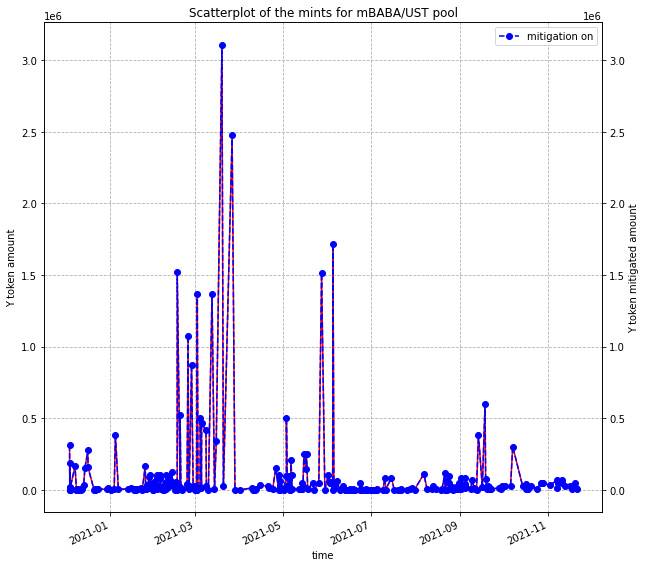

In [8]:
plot_mints(mbaba_ust_mints_mitigation_on_df, mbaba_ust_mints_mitigation_off_df, pool_name='mBABA/UST')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [9]:
mbaba_ust_filtered_swaps_df, mbaba_ust_mevs_df = mbaba_ust_sim.extract_filtered_and_mevs_dfs()

initial len = 1830, filtered len = 1820
txds = 10
out values = 5


In [10]:
mbaba_ust_suspicious_filtered_swaps_df, mbaba_ust_possible_mevs_df = mbaba_ust_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 1830, filtered len = 1824
txds = 6
out values = 3.0


In [ ]:
mbaba_ust_mevs_df = mbaba_ust_sim.calculate_attack_profit(mbaba_ust_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

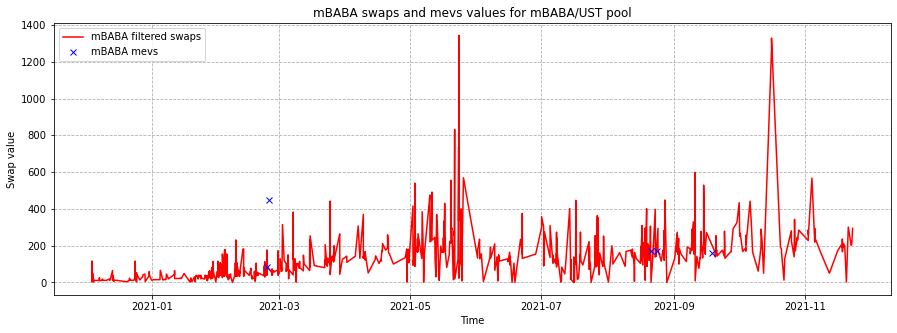

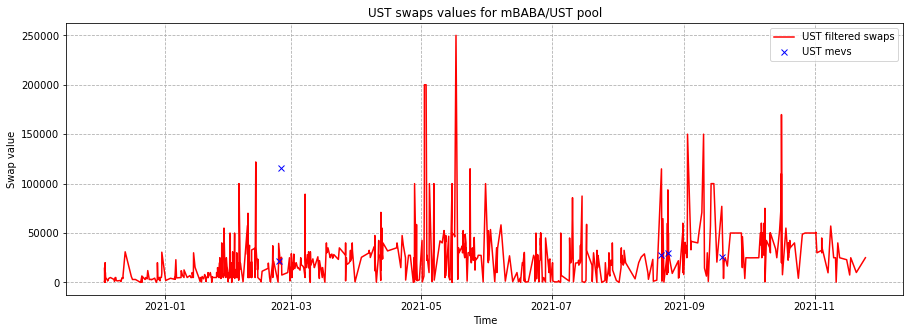

In [11]:
mbaba_ust_sim.show_swaps_and_mevs_by_token(mbaba_ust_filtered_swaps_df, mbaba_ust_mevs_df, width=15, height=5)

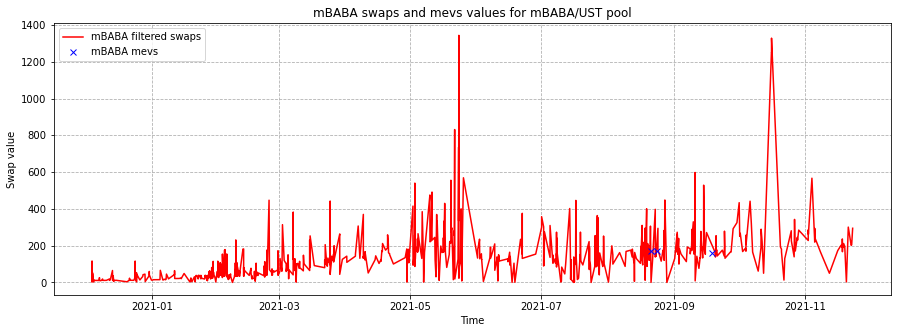

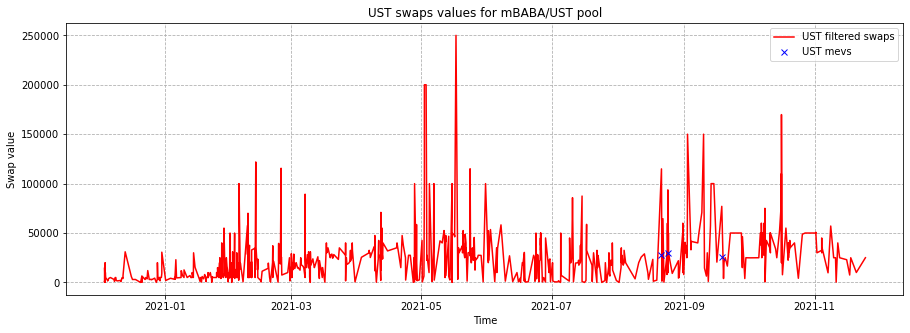

In [12]:
mbaba_ust_sim.show_swaps_and_mevs_by_token(mbaba_ust_suspicious_filtered_swaps_df, mbaba_ust_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

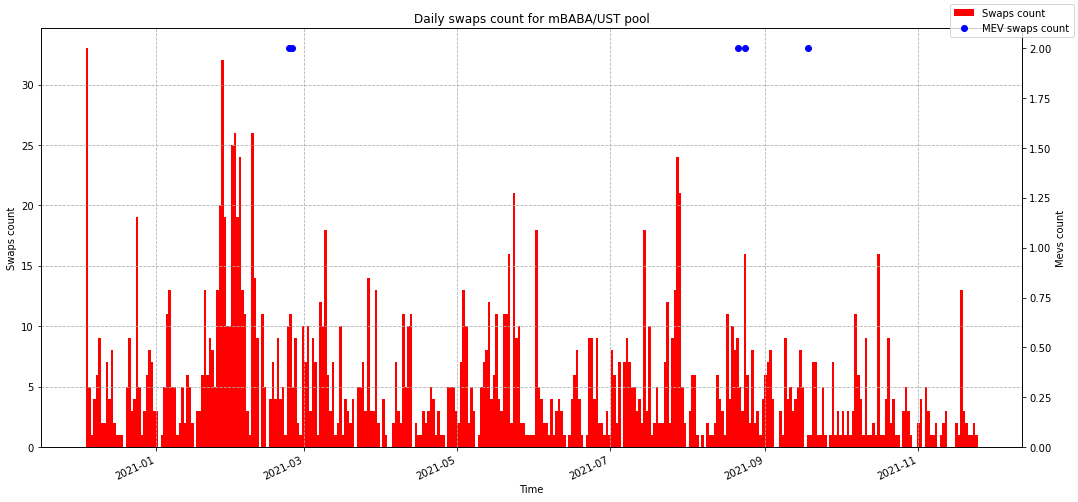

In [13]:
mbaba_ust_sim.show_swaps_and_mevs_daily_count_by_token(mbaba_ust_filtered_swaps_df, mbaba_ust_mevs_df, mevs_alter_axis=True)

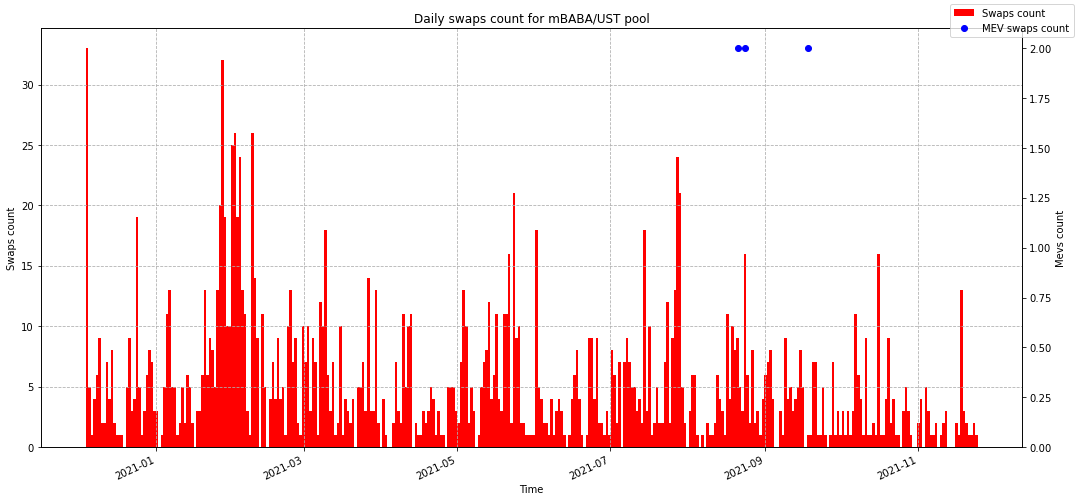

In [14]:
mbaba_ust_sim.show_swaps_and_mevs_daily_count_by_token(mbaba_ust_suspicious_filtered_swaps_df, mbaba_ust_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

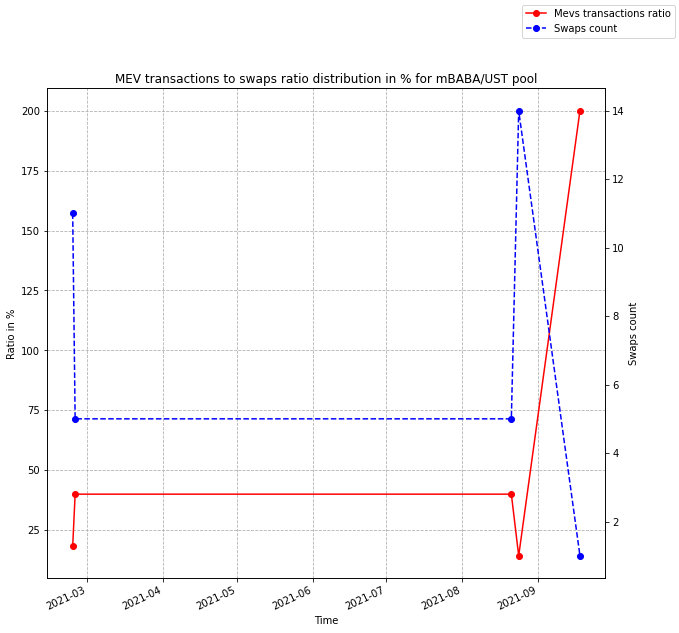

In [15]:
mbaba_ust_sim.show_mevs_to_swaps_ratio(mbaba_ust_filtered_swaps_df, mbaba_ust_mevs_df)

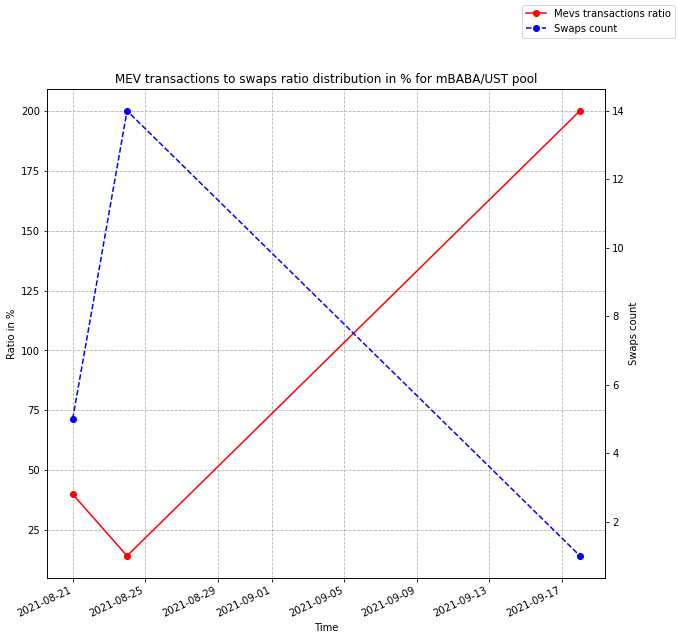

In [16]:
mbaba_ust_sim.show_mevs_to_swaps_ratio(mbaba_ust_suspicious_filtered_swaps_df, mbaba_ust_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

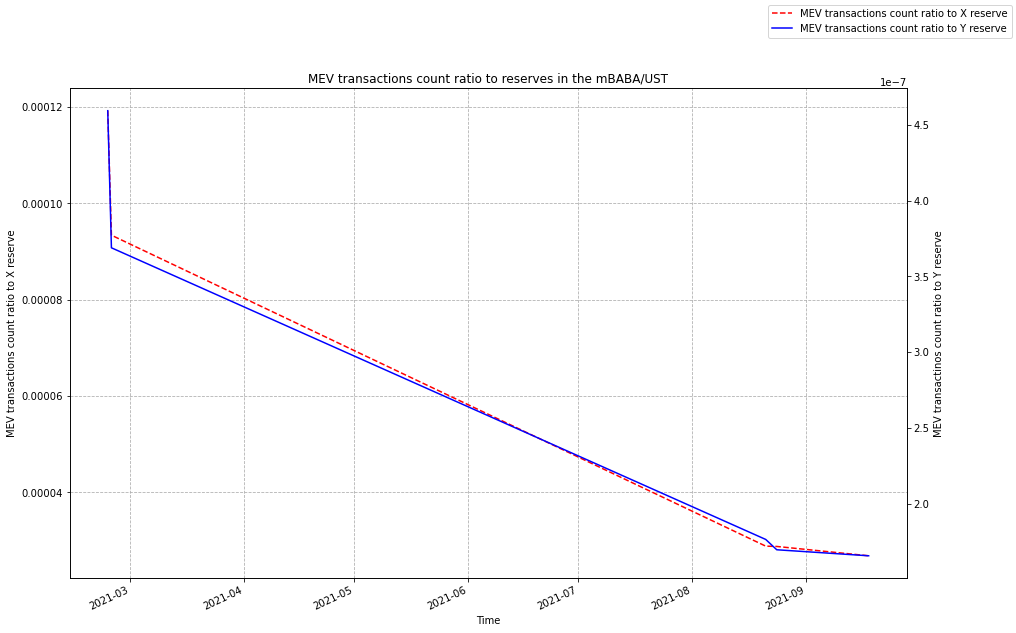

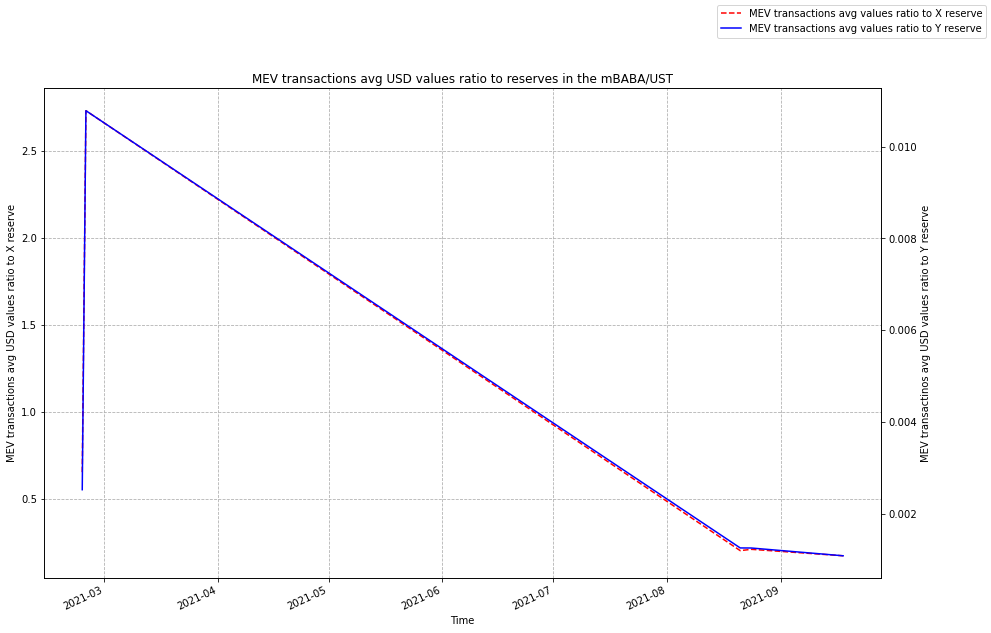

In [18]:
mbaba_ust_sim.show_mevs_to_reserves_ratio(mbaba_ust_swaps_mitigation_off_df, mbaba_ust_mevs_df, width=15, height=10)
mbaba_ust_sim.show_mevs_values_to_reserves_ratio(mbaba_ust_swaps_mitigation_off_df, mbaba_ust_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

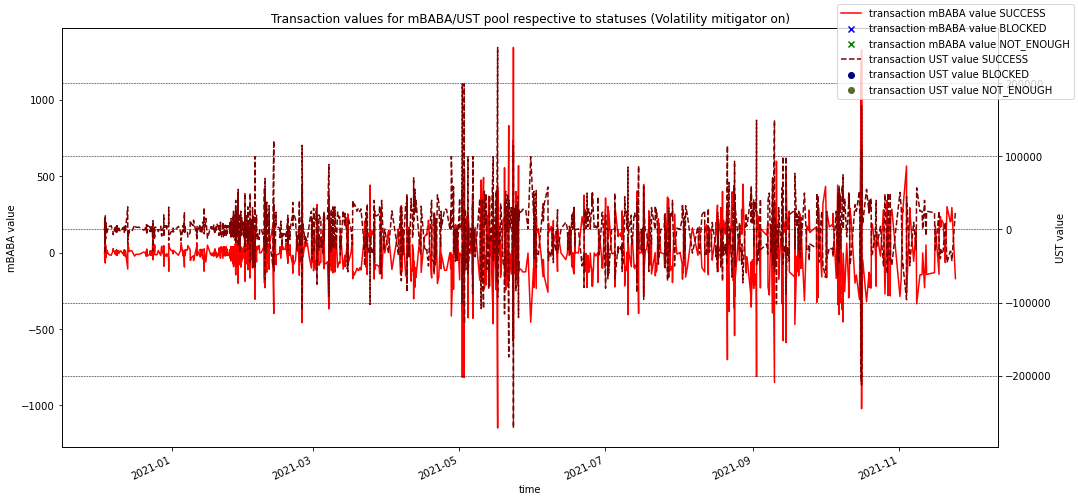

In [19]:
mbaba_ust_sim.plot_transactions_by_type(mbaba_ust_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

Original mBABA/UST pool has next statuses counts:
SUCCESS    1830
Name: status, dtype: int64
Mitigated mBABA/UST dataframe has next statuses counts:
SUCCESS    1830
Name: status, dtype: int64
TWAP unavailability ratio for mBABA/UST is 0.006557377049180328
Mitigated mBABA/UST dataframe has next Mitigator statuses:
CHECKED                1818
CANT_CONSULT_ORACLE      12
Name: mitigator_check_status, dtype: int64


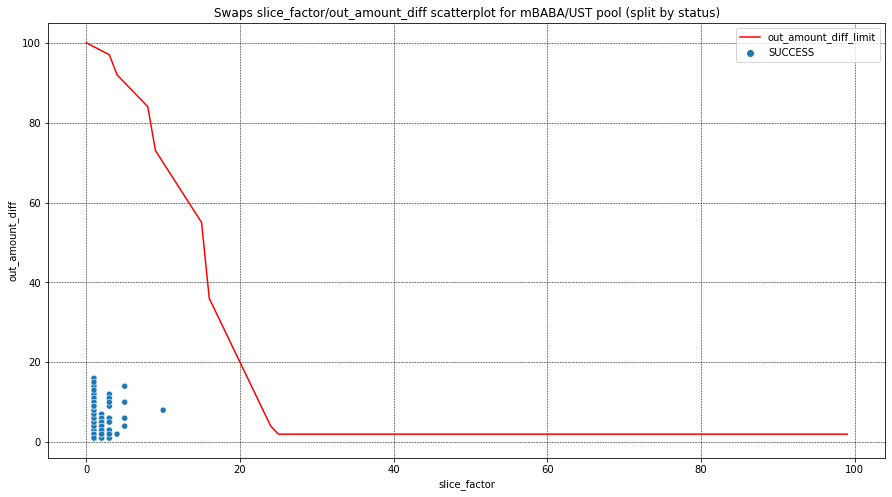

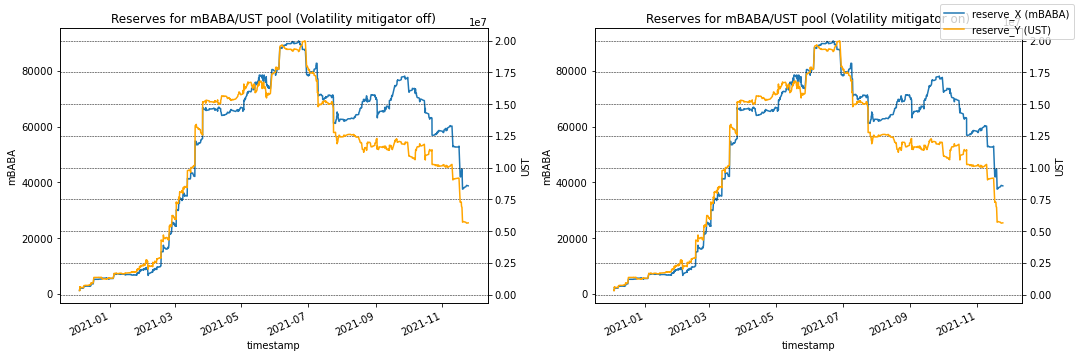

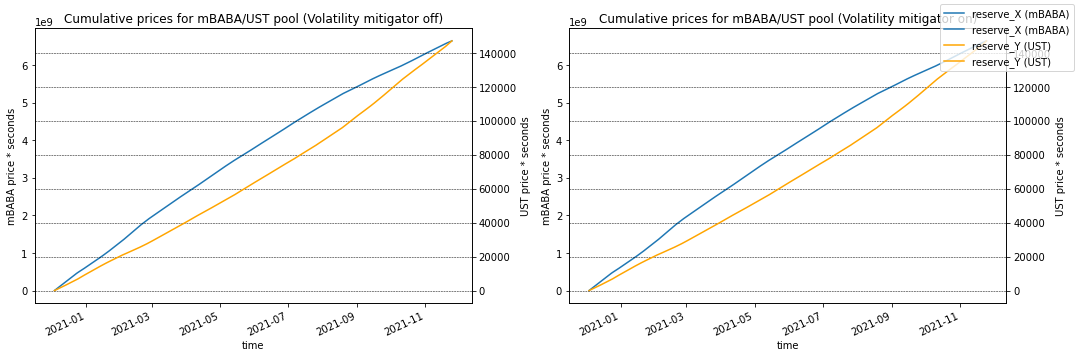

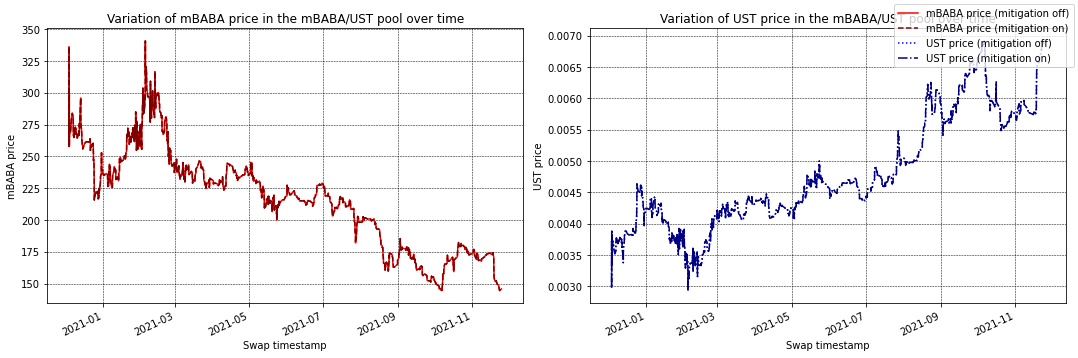

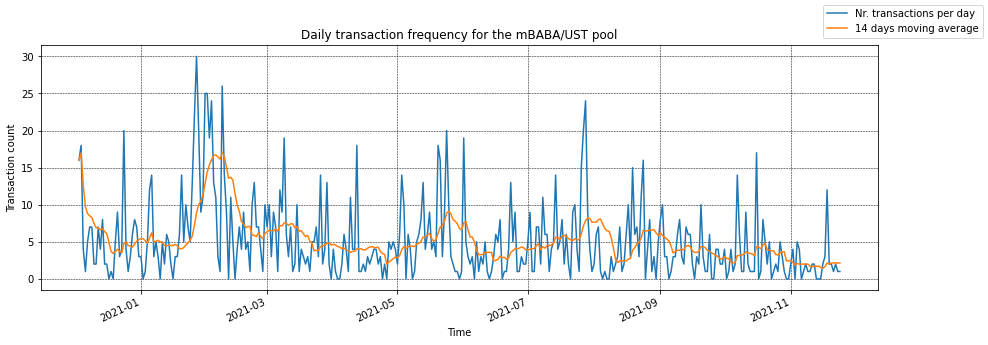

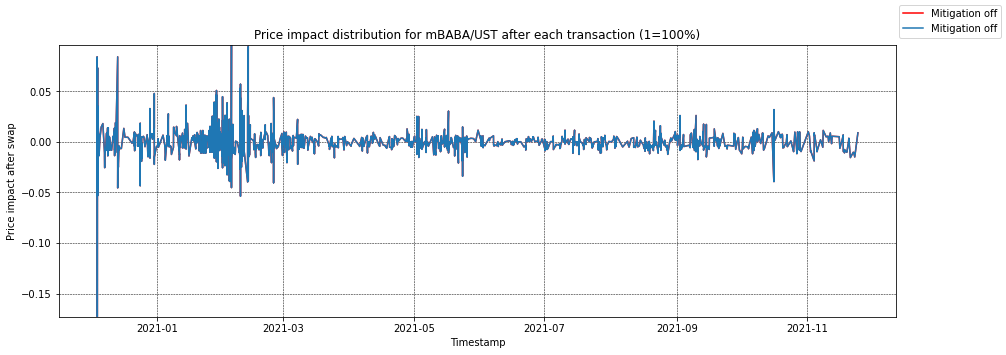

In [20]:
mbaba_ust_sim.show_mitigation_comparison(mbaba_ust_swaps_mitigation_off_df, mbaba_ust_swaps_mitigation_on_df)
mbaba_ust_sim.px_hist_blocked_transactions_slice(mbaba_ust_swaps_mitigation_on_df)
mbaba_ust_sim.px_hist_blocked_transactions_difference_from_oracle(mbaba_ust_swaps_mitigation_on_df)
mbaba_ust_sim.plot_slice_distribution_and_diff_limit_line(mbaba_ust_swaps_mitigation_on_df)
mbaba_ust_sim.plot_reserves_with_and_without_mitigation(mbaba_ust_swaps_mitigation_off_df, mbaba_ust_swaps_mitigation_on_df)
mbaba_ust_sim.plot_cumulative_prices_with_and_without_mitigation(mbaba_ust_swaps_mitigation_off_df, mbaba_ust_swaps_mitigation_off_df, make_big_num_convert=True)
mbaba_ust_sim.plot_price_distribution(mbaba_ust_swaps_mitigation_off_df, mbaba_ust_swaps_mitigation_on_df, separate_plots=True)
mbaba_ust_sim.plot_frequency_distribution(mbaba_ust_swaps_mitigation_on_df)
mbaba_ust_sim.plot_price_impact(mbaba_ust_swaps_mitigation_off_df, mbaba_ust_swaps_mitigation_on_df, 
                                smallest_y=mbaba_ust_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=mbaba_ust_swaps_mitigation_off_df['price_diff'].max())

In [21]:
mbaba_ust_blocked_df = mbaba_ust_swaps_mitigation_on_df[mbaba_ust_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
mbaba_ust_blocked_mevs_df = pd.merge(mbaba_ust_blocked_df, mbaba_ust_mevs_df, on='txd')
mbaba_ust_blocked_mevs_df

,id,token_in_x,token_out_x,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,sender_x,to_x,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff,token_in_y,token_out_y,amount_in,amount_out,amount_usd,timestamp,sender_y,to_y,txd


In [22]:
mbaba_ust_blocked_df = mbaba_ust_swaps_mitigation_on_df[mbaba_ust_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
mbaba_ust_blocked_mevs_df = pd.merge(mbaba_ust_blocked_df, mbaba_ust_possible_mevs_df, on='txd')
mbaba_ust_blocked_mevs_df

,id,token_in_x,token_out_x,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,sender_x,to_x,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff,token_in_y,token_out_y,amount_in,amount_out,amount_usd,timestamp,sender_y,to_y,txd
